## Základné nastavenia

Importujeme potrebné knižnice. Nasledujúci odstavec by mal byť spustený ako prvý predtým ako sa budú používať importované objekty `pd`, `np`, `plt` a `sns`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()

## Dátová množina - Titanic


[RMS Titanic](https://en.wikipedia.org/wiki/RMS_Titanic) bola britská osobná loď, ktorá stroskotala 15 apríla 1912 na svojej prvej komerčnej plavbe. V čase svojej služby bola najväčšou plávajúcou loďou na svete. Pri nehode zahynulo viac než 1500 osôb z celkového odhadovaného počtu 2224 pasažierov a členov posádky.

![RMS Titanic](titanic.jpg)
[Zdroj](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic)

Dátová množina obsahuje informácie o pasažieroch Titanicu. Každý pasažier je popísaný nasledovnými atribútmi:
* `pclass` - trieda, v ktorej pasažier cestoval
* `survived` - udáva, či pasažier nehodu parníku prežil (1), alebo nie (0)
* `name` - meno cestujúceho
* `sex` - pohlavie
* `age` - vek
* `sibsp` - počet súrodencov pasažiera, resp. druhov/družiek
* `parch` - počet rodičov/detí medzi cestujúcimi
* `ticket` - číslo lístka
* `fare` - výška cestovného
* `cabin` - kajuta v ktorej bol cestujúci ubytovaný
* `embarked` - prístav, kde cestujúci nastúpil (`S` - Southampton, `C` - Cherbourg, `Q` - Queenstown)

In [2]:
data = pd.read_csv("../data/titanic.csv") # načítame si dáta zo súboru ../data/titanic.csv
print(data.shape) # zobrazíme rozmer dátovej tabuľky v tvare (počet riadkov, počet stĺpcov)
print(data.columns) # zobrazíme názvy stĺpcov

(1309, 11)
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')


In [3]:
data.head() # zobrazíme prvých 5 riadkov tabuľky

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Úprava hodnôt

Keďže označenie lístka nevieme priamo interpretovať a nevieme z neho zistiť užitočné informácie o pasažieroch, stĺpec `ticket` odstránime z dátovej tabuľky.

In [6]:
data.drop(columns="ticket", inplace=True) # odstránime stĺpec ticket priamo z dátového rámca data

KeyError: "['ticket'] not found in axis"

V sĺpci `embarked` si nahradíme skratky `S`, `Q`, a `C` za `Southampton`, `Queenstown` a `Cherbourg`.

In [5]:
 # hodnoty kategorických atribútov môžete premapovať pomocou metódy map objektu typu Series
data["embarked"] = data["embarked"].map({"S": "Southampton", "Q": 'Queenstown', "C":"Cherbourg"})
data["embarked"].value_counts() # zobrazíme si rôzne hodnoty po nahradení a ich početnosti

Southampton    914
Cherbourg      270
Queenstown     123
Name: embarked, dtype: int64

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin',
       'embarked', 'family', 'has_family', 'title', 'title_short',
       'fare_ordinal', 'age_ordinal'],
      dtype='object')


### Nahradenie chýbajúcich hodnôt 1

Jedným zo základných krokov predspracovania dát je spracovanie prázdnych hodnôt. Pri výskyte prázdnych hodnôt je potrebné rozlišovať, či ide o _chýbajúce hodnoty_ - tzn. daný záznam by mal mať uvedenú hodnotu, ale z nejakého dôvodu nie je vyplnená, alebo či pre daný záznam daný atribút nemá význam uvádzať. Pri chýbajúcich hodnotách sa môžeme pokúsiť hodnoty doplniť tak, aby sme čo najmenej narušili vzťahy v dátach, resp. ak je chýbajúcich hodnôt príliš veľa, môžeme z dátovej množiny odstrániť jednotlivé stĺpce, alebo záznamy s chýbajúcimi hodnotami.

In [7]:
# metóda isna vráti tabuľku iba s Boolovskými hodnotami pre každý stĺpec (True - chýbajúca hodnota, False - neprázdna hodnota)
# sum potom spočíta počet hodnôt True (tzn. počet chýbajúcich hodnôt pre každý stĺpec)
data.isna().sum() # spočítame si počet chýbajúcich hodnôt

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
fare           1
cabin       1014
embarked       2
dtype: int64

Nahradíme chýbajúe hodnoty pre stĺpec `fare`.

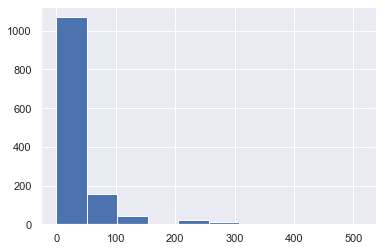

In [8]:
p = data["fare"].hist() # vykreslíme si histogram hodnôt

In [9]:
# vypočítame si strednú hodnotu a medián
fare_mean = data["fare"].mean()
fare_median = data["fare"].median()
print("fare mean: {0:.4f}, median: {1:.4f}".format(fare_mean, fare_median))

fare mean: 33.2955, median: 14.4542


In [10]:
# keďže hodnoty fare sú značne vychýlené, chýbajúce hodnoty nahradíme mediánom, ktorý lepšie charakterizuje najčastejšie sa vyskytujúce hodnoty
data["fare"].fillna(fare_median, inplace=True)
data["fare"].isna().sum() # skontrolujeme počet chýbajúcich hodnôt po nahradení

0

### Úloha 7.1

Chýbajúce hodnoty pre atribút `embarked` nahraďte najfrekventovanejšou hodnotou.

In [14]:
# nahraďte chýbajúce hodnoty

# skontrolujeme počet chýbajúcich hodnôt po nahradení
data["embarked"].isna().sum()

0

In [13]:
data["embarked"].fillna("Southampton", inplace=True)

### Odvodenie nových atribútov

Odvodením nových atribútov z existujúcich hodnôt môžeme z dátovej množiny často získať užitočné informácie, ktoré v nej nie sú priamo vyjadrené.

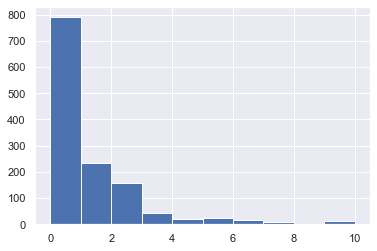

In [15]:
# vytvoríme si nový atribút family, ktorý bude udávať celkový počet príbuzných (súčet sibsp + parch)
data["family"] = data.eval("sibsp + parch")
p = data["family"].hist()

In [16]:
# vytvoríme si nový binárny atribút has_family, ktorý bude udávať, či pasažier cestoval s rodinou
data["has_family"] = data.eval("family > 0")
data["has_family"].sum() # spočítame, koľko pasažierov cestovalo s rodinou

519

Mená pasažierov sú vo formáte `priezvisko, titul. meno`. Vyextrahujeme si z mena hodnoty titulov.

In [17]:
# definujeme si funkciu, ktorá z celého reťazca mena vyextrahuje iba časť titulu
def extract_title(name):
    if pd.isna(name): # pomocou pd.isna otestujeme, či je name prázdna hodnota
        return np.nan # ak je name prázdna hodnota, vrátime prázdnu hodnotu aj pre titul
                      # (prázdne hodnoty sú v pandas reprezentované číselnou konštantou np.nan - Not A Number)
    start = name.find(",") + 1
    end = name.find(".")
    return name[start:end].strip() # z mena vrátime podreťazec od , do . (bez prázdnych znakov na začiatku a konci)

# pomocou metódy apply aplikujeme našu funkciu extract_title na všetky hodnoty stĺpca name a vrátené hodnoty uložíme v stĺpci title
data["title"] = data["name"].apply(extract_title)
# stĺpec name už nebudeme potrebovať, tak ho odstránime z dátovej tabuľky
data.drop(columns="name", inplace=True)
# zobrazíme si tituly a koľko krát sa vyskytli
data["title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Don               1
Jonkheer          1
Mme               1
Dona              1
Lady              1
Sir               1
Capt              1
the Countess      1
Name: title, dtype: int64

In [18]:
# pomocou metódy apply si premapujeme tituly na skrátený zoznam, ktorý priradíme do stĺpca title_short
def map_title(title):
    # všetky hodnostné, alebo šľachtické tituly namapujeme na hodnotu 'rare title'
    if title in {"Master", "Dr", "Rev", "Col", "Major", "Don", "Jonkheer", "Sir", "Dona", "Lady", "Capt", "the Countess"}:
        return "rare title"
    elif title in {"Mlle", "Ms"}: # tituly z francúzštiny
        return "Miss"
    elif title in {"Mme"}:
        return "Mrs"
    return title;

data["title_short"] = data["title"].apply(map_title)
data["title_short"].value_counts()

Mr            757
Miss          264
Mrs           198
rare title     90
Name: title_short, dtype: int64

### Nahradenie chýbajúcich hodnôt 2

Chýbajúce hodnoty jedného atribútu môžeme lepšie odhadnúť na základe iných atribútov. Napr. zobrazíme si rozdielny vek podľa pohlavia a titulu.

In [19]:
# v kontingenčnej tabuľke si zoskupíme dáta podľa pohlavia a titulu pasažierov a vypočítame základné štatistiky o veku
# parameter margins=True pridáva do kontingenčnej tabuľky celkové štatistiky pre každý riadok a stĺpec
pd.pivot_table(data, index=["sex", "title_short"], values="age", aggfunc=["median", "mean", "min", "max", "count"], margins=True)

median       mean    min   max count
                      age        age    age   age   age
sex    title_short                                     
female Miss          22.0  21.824366   0.17  63.0   213
       Mrs           35.0  36.918129  14.00  76.0   171
       rare title    43.5  42.250000  33.00  49.0     4
male   Mr            29.0  32.252151  11.00  80.0   581
       rare title     9.0  18.007532   0.33  70.0    77
All                  28.0  29.881138   0.17  80.0  1046

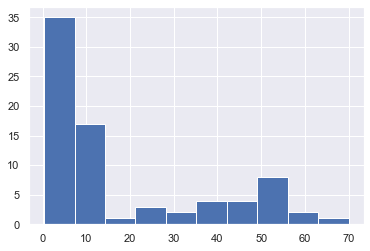

In [20]:
# zaujímavý je nízky vek mužov s šľachtickým titulom, zobrazíme si histogram hodnôt v tejto skupine pasažierov
l = data.query("sex == 'male' and title_short == 'rare title'")["age"].hist()

Metódu `apply` môžeme aplikovať aj na transformovanie/extrahovanie dát odvodených z hodnôt na danom riadku. V nasledujúcom kóde nahradíme chýbajúce hodnoty veku mediánom podľa hodnôt pohlavia a titulu.

In [21]:
# najprv si vypočítame medián pre jednotlivé skupiny pomocou kontingenčnej tabuľky
ptable = pd.pivot_table(data, index=["sex", "title_short"], values="age", aggfunc="median")
ptable

age
sex    title_short      
female Miss         22.0
       Mrs          35.0
       rare title   43.5
male   Mr           29.0
       rare title    9.0

Riadky a stĺpce kontingenčnej tabuľky môžu byť označené na viacerých úrovniach, takže musíme pri prístupe k hodnotám tabuľky ako index zadať n-ticu hodnôt pre každú úroveň.
V našej tabuľke uloženej v premennej `ptable` majú stĺpce len jednu úroveň (`age`), ale riadky sú označené dvoma úrovňami (`sex` a `title_short`).

In [22]:
# ak chceme napr. vypísať konkrétnu hodnotu na riadku pre kombináciu (female, Miss), musíme zadať index ako n-ticu
# (podobne by sme museli zadaň n-ticu hodnôt aj pre stĺpce, ak by sme mali hierarchické označenia stĺpcov)
ptable["age"][("female", "Miss")]

22.0

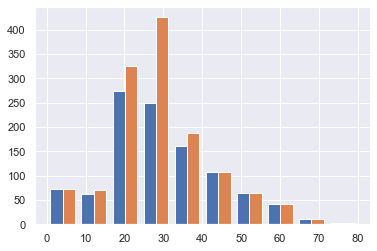

In [23]:
# do premennej age1 si uložíme iba neprázdne hodnoty age (pôvodné dáta sa nezmenia)
age1 = data["age"].dropna() # metóda dropna vráti iba záznamy s neprázdnymi hodnotami

# definujeme si funkciu s ktorou nahradíme chýbajúce hodnoty veku podľa pohlavia a titulu
# row bude objekt reprezentujúci jeden riadok v tabuľke
def replace_missing_age(row):
    # k hodnotám riadku pre jednotlivé stĺpce môžeme pristupovať indexovaním
    age = row["age"] # zistíme si vek, pohlavie a titul pasažiera
    sex = row["sex"]
    title = row["title_short"]
    # ak je vek chýbajúca hodnota, nahradíme ho mediánom v danej skupine určenej podľa pohlavia a titulu
    # (vypočítané hodnoty mediánov máme uložené v kontingenčnej tabuľke ptable)
    if pd.isna(age):
        return ptable["age"][(sex, title)]
    else:
        return age # inak vrátime známu hodnotu

# aplikujeme funkciu replace_missing_age na každý riadok tabuľky (axis=1, prednastavená hodnota axis=0 by aplikovala funkciu po stĺpcoch)
# výsledok sú hodnoty age s nahradenými chýbajúcimi hodnotami, ktoré si uložíme do premennej age2
age2 = data.apply(replace_missing_age, axis=1)

# pre porovnanie si naraz vykreslíme histogram bez nahradenia a po nahradení chýbajúcich hodnôt
p = plt.hist([age1, age2])

In [24]:
data["age"] = age2 # nahradíme stĺpec age s vyplnenými chýbajúcimi hodnotami v pôvodných dátach

### Prevedenie číselných atribútov na ordinálne - _diskretizácia hodnôt_

Číselné atribúty je možné jednoducho previesť na ordinálne (usporiadané kategorické) atribúty rozdelením na intervaly. Hodnoty môžu byť rozdelené na rovnako široké intervaly, alebo podľa dát na rôzne intervaly tak aby bola početnosť hodnôt v každom intervale približne rovnaká.

In [25]:
data["fare"].describe() #zobrazíme si základné štatistiky pre atribút fare

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [26]:
data["fare_ordinal"] = pd.cut(data["fare"], 3) # pomocou metódy cut rozdelíme hodnoty do 3 rovnako veľkých intervalov
data["fare_ordinal"].value_counts() # zobrazíme si označenia intervalov a ich početnosti

(-0.512, 170.776]     1271
(170.776, 341.553]      34
(341.553, 512.329]       4
Name: fare_ordinal, dtype: int64

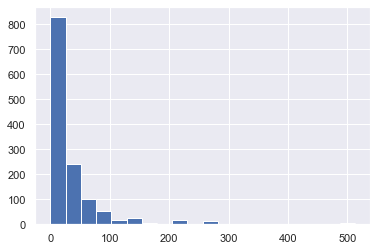

In [27]:
# väčšina hodnôt patrí približne do intervalu od 0-170, pre lepšie pochopenie distribúcie hodnôt si zobrazíme histogram
p = data["fare"].hist(bins=20) # parameter bins udáva počet intervalov pre výpočet histogramu

In [28]:
# namiesto rozdelenia na rovnako veľké intervaly môžeme dáta rozdeliť pomocou metódy qcut na intervaly s približne rovnakým počtom hodnôt
data["fare_ordinal"] = pd.qcut(data["fare"], 3)
data["fare_ordinal"].value_counts() # zobrazíme si označenia intervalov a ich početnosti

(-0.001, 8.662]    454
(8.662, 26.0]      429
(26.0, 512.329]    426
Name: fare_ordinal, dtype: int64

In [ ]:
# pri metóde cut môžeme priamo zadať hraničné hodnoty intervalov, napr. rozdelíme fare na intervaly [0-25], (25-100] a (100, 520]
# štandardne prvý interval nezahŕňa najmenšiu hodnotu, takže ak chceme zahrnúť aj 0 hodnoty, nastavíme include_lowest na True
data["fare_ordinal"] = pd.cut(data["fare"], bins=[0, 25, 100, 520], include_lowest=True)
data["fare_ordinal"].value_counts()

In [ ]:
# označenia intervalov môžeme priamo pomenovať zadaním parametra labels
data["fare_ordinal"] = pd.cut(data["fare"], bins=[0, 25, 100, 520], include_lowest=True, labels=["normal", "more expensive", "most expensive"])
data["fare_ordinal"].value_counts()

### Závislosti medzi kategorickými atribútmi

Závislosti medzi kategorickými atribútmi môžete skúmať pomocou krížových tabuliek, ktoré udávajú početnosť výskytu všetkých kombinácií hodnôt medzi zvolenými kategorickými atribútmi podobne, ako kontingenčné tabuľky sumarizujú závislosť medzi kategorickými a číselnými hodnotami. Krížové tabuľky sa generujú pomocou metódy `crosstab`.

In [29]:
# vypočítame tabuľku početností pre všetky kombinácie hodnôt medzi atribútmi pclass a sex
# všimnite si, že do metódy crosstab musíte narozdiel od pivot_table zadať ako index a columns
# priamo dátové atribúty (objekty typu Series)
pd.crosstab(index=data["pclass"], columns=data["sex"])

sex,female,male
pclass,,
1,144,179
2,106,171
3,216,493


In [30]:
# podobne ako pri kontingenčnej tabuľke, ako riadky, alebo stĺpce môžeme zadať viacero
# atribútov
# napr. v nasledujúcej tabuľke vypočítame pre každú kombináciu triedy a výšky cestovného,
# koľko žien a koľko mužov si kúpilo daný lístok
pd.crosstab(index=[data["pclass"], data["fare_ordinal"]], columns=data["sex"])

sex                     female  male
pclass fare_ordinal                 
1      (-0.001, 8.662]       0     8
       (8.662, 26.0]         3    11
       (26.0, 512.329]     141   160
2      (-0.001, 8.662]       0     6
       (8.662, 26.0]        76   135
       (26.0, 512.329]      30    30
3      (-0.001, 8.662]      95   345
       (8.662, 26.0]        97   107
       (26.0, 512.329]      24    41

### Úloha 7.2

Odvoďte nový atribút `age_ordinal` diskretizovaním hodnôt `age` na intervaly 0-13, 13-19, 19-65, 65-maximálny vek s označeniami `child`, `young`, `adult`, `old`.

In [34]:
max_age = data["age"].max()
data["age_ordinal"]=pd.cut(data["age"], bins=[0, 13, 19, 65, max_age], include_lowest= True, labels=["child", "young", "adult", "adults"])
data["age_ordinal"].value_counts()

adult     1065
young      126
child      108
adults      10
Name: age_ordinal, dtype: int64

### Úloha 7.3
Pomocou krížovej tabuľky zistite, koľko mužov a žien má aký titul.

In [38]:
pd.crosstab(index=data["sex"], columns=data["title"])

title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


### Úloha 7.4
Vytvorte kontingenčnú tabuľku v ktorej prehľadne zobrazíte počet zachránených pasažierov pre skupiny rozdelené podľa veku (`age_ordinal`), triedy a pohlavia. Ak použijete ako agregačnú funkciu strednú hodnotu `survived`, ako môžete výsledné čísla interpretovať?

In [47]:
#pd.pivot_table(data, index="Region", values=["Score", "Rank"], aggfunc={"Score": "mean", "Rank": ["min", "max"]})
pd.pivot_table(data, index=["sex", "pclass"], columns="age_ordinal", values="survived", aggfunc="mean")

age_ordinal       child     young     adult  adults
sex    pclass                                      
female 1       0.000000  1.000000  0.968504     1.0
       2       1.000000  0.900000  0.865854     NaN
       3       0.483871  0.593750  0.470588     NaN
male   1       0.833333  0.200000  0.331288     0.2
       2       1.000000  0.062500  0.091549     0.0
       3       0.333333  0.083333  0.140704     0.0

In [54]:
#factors = data[["pclass", "survived", "sex", "title_short", "age"]]
# pomocou metódy corr vypočítame korelačnú tabuľku
#corr_table = factors.corr()
#corr_table
#p = sns.pairplot(factors)

,pclass,survived,age
pclass,1.000000,-0.312469,-0.388131
survived,-0.312469,1.000000,-0.049404
age,-0.388131,-0.049404,1.000000


### Úloha 7.5
Zistite, či má na prežitie vplyv výška cestovného, alebo miesto nalodenia. 

In [59]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,family,has_family,title,title_short,fare_ordinal,age_ordinal
0,1,1,female,29.00,0,0,211.3375,B5,Southampton,0,False,Miss,Miss,"(26.0, 512.329]",adult
1,1,1,male,0.92,1,2,151.5500,C22 C26,Southampton,3,True,Master,rare title,"(26.0, 512.329]",child
2,1,0,female,2.00,1,2,151.5500,C22 C26,Southampton,3,True,Miss,Miss,"(26.0, 512.329]",child
3,1,0,male,30.00,1,2,151.5500,C22 C26,Southampton,3,True,Mr,Mr,"(26.0, 512.329]",adult
4,1,0,female,25.00,1,2,151.5500,C22 C26,Southampton,3,True,Mrs,Mrs,"(26.0, 512.329]",adult


In [67]:
pd.pivot_table(data, index="embarked", columns="fare_ordinal", values="survived")
#pivot_table.plot(kind="barh")

fare_ordinal,"(-0.001, 8.662]","(8.662, 26.0]","(26.0, 512.329]"
embarked,,,
Cherbourg,0.258621,0.516129,0.686667
Queenstown,0.351648,0.434783,0.222222
Southampton,0.173770,0.345930,0.501873


### Úloha 7.6

Označenia kajuty začínajú písmenom, ktoré označuje palubu na ktorej sa kajuta nachádzala (napr. kajuta `C22` sa nachádzala na palube `C`, atď.). Pomocou metódy `apply` odvoďte nový atribút `deck` s označením paluby.

Na ktorej palube by ste mali väčšiu šancu na záchranu?